In [1]:
import numpy as np
import matplotlib.pyplot as plt

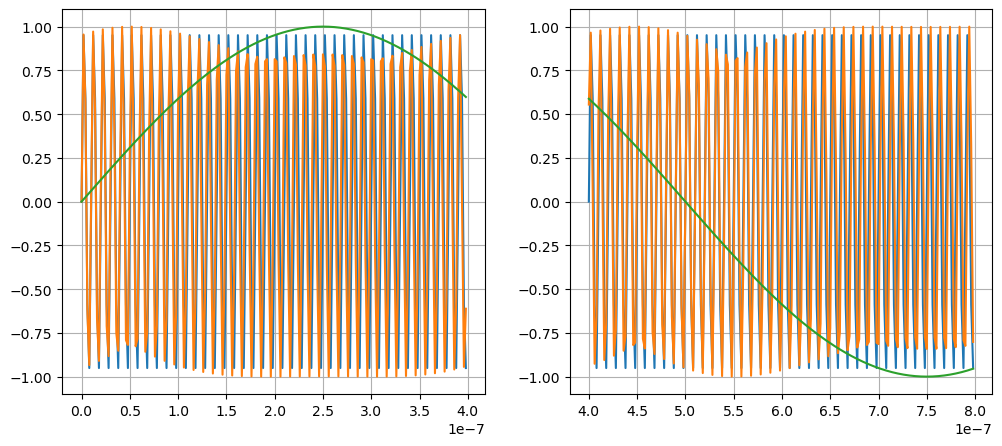

In [109]:
A0 = 1.0            # amplitude
B0 = 1.0
fc = 100e6           # carrier frequency (Hz)
c = 3e8             # speed of sound
Rt = 10000            # distance between transmitter and object
Rr = 10000            # distance between received and object
T = 1e-7        # signal duration (s)
fa = 1e6
fs = 500e6
t1 = np.arange(0, 4*T, 1/fs)
t2 = np.arange(4*T, 8*T, 1/fs)
wa = 2*np.pi*fa
wc = 2*np.pi*fc
B1=B0*np.sin(wa*t1)
B2=B0*np.sin(wa*t2)
transmitted_signal1 = A0*np.sin(B1+(t1*wc))
transmitted_signal2 = A0*np.sin(B2+(t2*wc))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(t1,A0*np.sin(t1*wc))
plt.plot(t1,transmitted_signal1)
plt.plot(t1,B1)
plt.grid()

plt.subplot(1,2,2)
plt.plot(t2,A0*np.sin(t2*wc))
plt.plot(t2,transmitted_signal2)
plt.plot(t2,B2)
plt.grid()

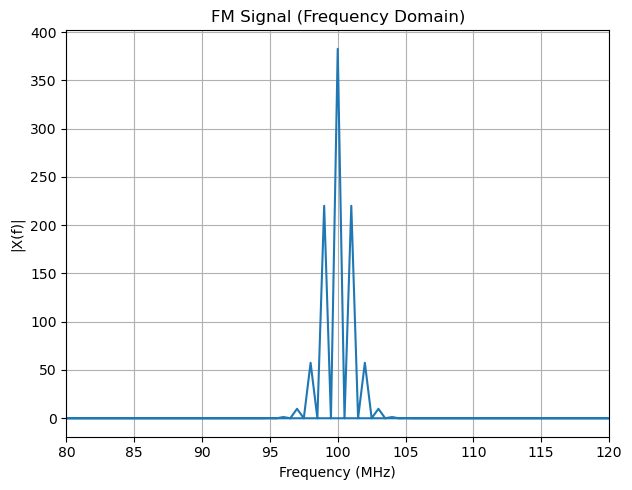

In [183]:
A0 = 1.0
B0 = 1.0
fc = 100e6        # carrier frequency
fa = 1e6          # message frequency
fs = 500e6        # sampling rate
T = 20e-7         # signal duration 

t = np.arange(0, T, 1/fs)

wa = 2*np.pi*fa
wc = 2*np.pi*fc
B = B0 * np.sin(wa*t)
transmitted_signal = A0 * np.sin(wc*t + B)


N = len(transmitted_signal)
X = np.fft.fft(transmitted_signal)
f = np.fft.fftfreq(N, 1/fs)

plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
plt.plot(f/1e6, np.abs(X))   
plt.xlabel("Frequency (MHz)")
plt.ylabel("|X(f)|")
plt.title("FM Signal (Frequency Domain)")
plt.xlim(80,120)  # zoom around carrier ±5 MHz
plt.grid(True)

plt.tight_layout()
plt.show()


Relative normalization (max = 1, linear scale)

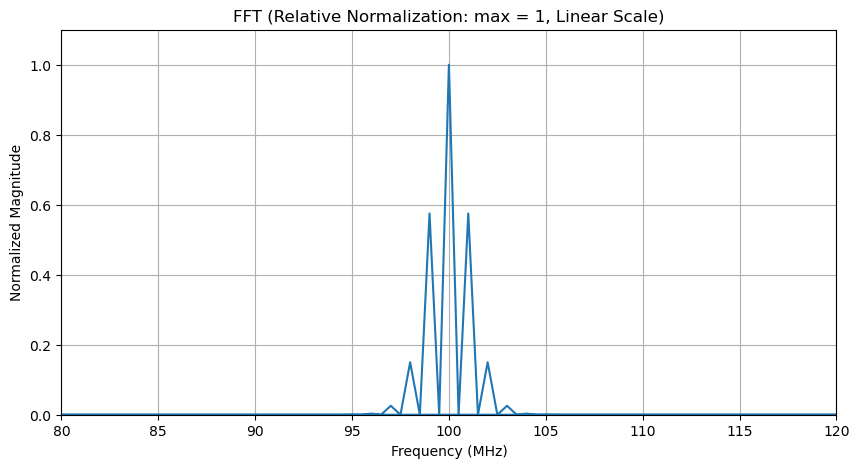

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A0 = 1.0
B0 = 1.0
fc = 100e6        # carrier frequency
fa = 1e6          # message frequency
fs = 500e6        # sampling rate
T = 20e-7         # signal duration 

t = np.arange(0, T, 1/fs)

wa = 2*np.pi*fa
wc = 2*np.pi*fc
B = B0 * np.sin(wa*t)
transmitted_signal = A0 * np.sin(wc*t + B)

# FFT
N = len(transmitted_signal)
X = np.fft.fft(transmitted_signal)
f = np.fft.fftfreq(N, 1/fs)

# Relative normalization (max = 1, linear scale)
X_rel = np.abs(X) / np.max(np.abs(X))

# Plot
plt.figure(figsize=(10,5))
plt.plot(f/1e6, X_rel)
plt.xlim(80,120)
plt.ylim(0,1.1)      
plt.title("FFT (Relative Normalization: max = 1, Linear Scale)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Normalized Magnitude")
plt.grid(True)
plt.show()


Power normalization (total power = 1) - Linear scale

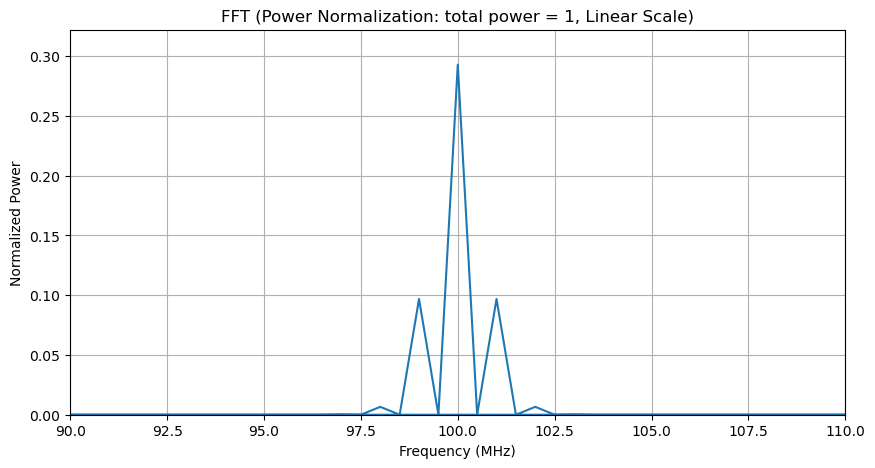

In [209]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A0 = 1.0
B0 = 1.0
fc = 100e6        # carrier frequency
fa = 1e6          # message frequency
fs = 500e6        # sampling rate
T = 20e-7         # signal duration 

t = np.arange(0, T, 1/fs)

wa = 2*np.pi*fa
wc = 2*np.pi*fc
B = B0 * np.sin(wa*t)
transmitted_signal = A0 * np.sin(wc*t + B)

# FFT
N = len(transmitted_signal)
X = np.fft.fft(transmitted_signal)
f = np.fft.fftfreq(N, 1/fs)

# Power normalization (total power = 1) - Linear scale
power = np.abs(X)**2
X_power = power / np.sum(power) 

# Plot
plt.figure(figsize=(10,5))
plt.plot(f/1e6, X_power)
plt.xlim(90,110)   
plt.ylim(0, max(X_power)*1.1)  
plt.title("FFT (Power Normalization: total power = 1, Linear Scale)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Normalized Power")
plt.grid(True)
plt.show()


LOG SCALE

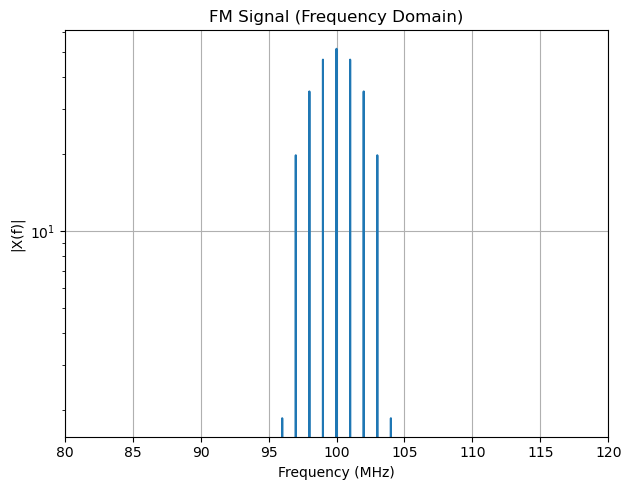

In [214]:
A0 = 1.0
B0 = 1.0
fc = 100e6        # carrier frequency
fa = 1e6          # message frequency
fs = 500e6        # sampling rate
T = 20e-7         # signal duration 

t = np.arange(0, T, 1/fs)

wa = 2*np.pi*fa
wc = 2*np.pi*fc
B = B0 * np.sin(wa*t)
transmitted_signal = A0 * np.sin(wc*t + B)


N = len(transmitted_signal)
X = np.fft.fft(transmitted_signal)
f = np.fft.fftfreq(N, 1/fs)

X_dB = 20 * np.log10(np.abs(X)) 

plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
plt.plot(f/1e6, X_dB)   
plt.xlabel("Frequency (MHz)")
plt.ylabel("|X(f)|")
plt.yscale('log')
plt.title("FM Signal (Frequency Domain)")
plt.xlim(80,120)  # zoom around carrier ±5 MHz
plt.grid(True)

plt.tight_layout()
plt.show()


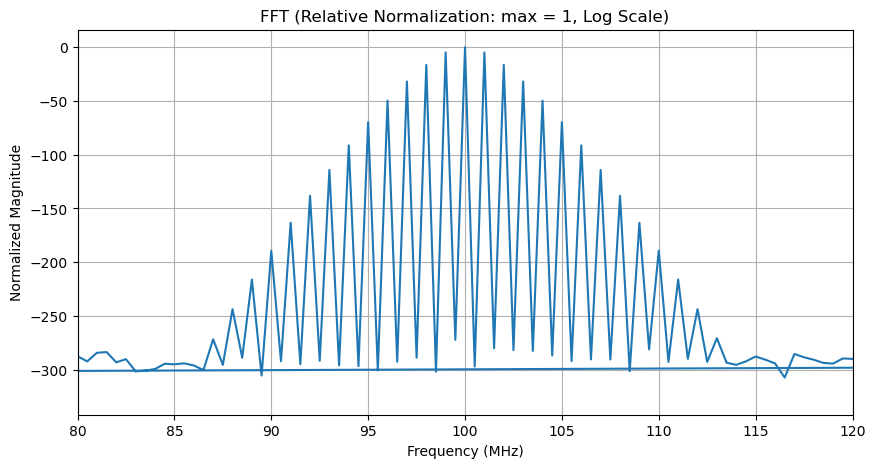

In [228]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A0 = 1.0
B0 = 1.0
fc = 100e6        # carrier frequency
fa = 1e6          # message frequency
fs = 500e6        # sampling rate
T = 20e-7         # signal duration 

t = np.arange(0, T, 1/fs)

wa = 2*np.pi*fa
wc = 2*np.pi*fc
B = B0 * np.sin(wa*t)
transmitted_signal = A0 * np.sin(wc*t + B)

# FFT
N = len(transmitted_signal)
X = np.fft.fft(transmitted_signal)
f = np.fft.fftfreq(N, 1/fs)

# Relative normalization (max = 1, linear scale)
X_rel = np.abs(X) / np.max(np.abs(X))
X_rel_db = 20 * np.log10(np.abs(X_rel))

# Plot
plt.figure(figsize=(10,5))
plt.plot(f/1e6, X_rel_db) 
plt.xlim(80,120)
plt.title("FFT (Relative Normalization: max = 1, Log Scale)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Normalized Magnitude")
plt.grid(True)
plt.show()


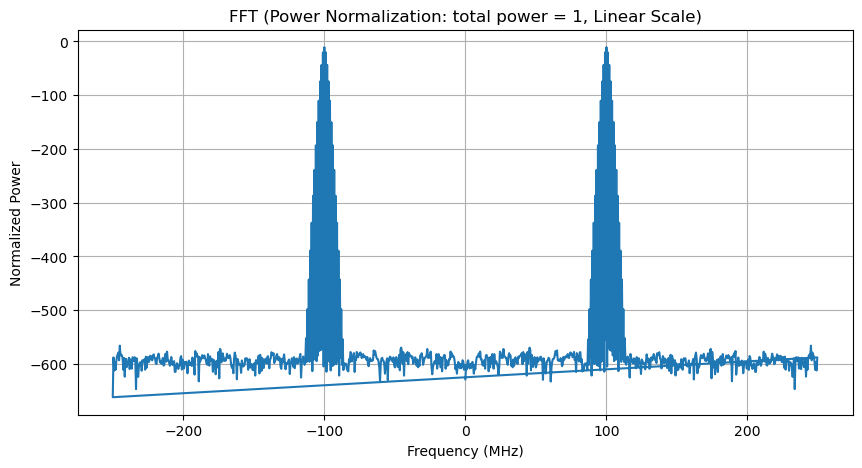

In [240]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A0 = 1.0
B0 = 1.0
fc = 100e6        # carrier frequency
fa = 1e6          # message frequency
fs = 500e6        # sampling rate
T = 20e-7         # signal duration 

t = np.arange(0, T, 1/fs)

wa = 2*np.pi*fa
wc = 2*np.pi*fc
B = B0 * np.sin(wa*t)
transmitted_signal = A0 * np.sin(wc*t + B)

# FFT
N = len(transmitted_signal)
X = np.fft.fft(transmitted_signal)
f = np.fft.fftfreq(N, 1/fs)

# Power normalization (total power = 1) - Linear scale
power = np.abs(X)**2
X_power = power / np.sum(power) 
X_power_db = 20 * np.log10(np.abs(X_power))

# Plot
plt.figure(figsize=(10,5))
plt.plot(f/1e6, X_power_db)
plt.xlim(80,120)   
plt.title("FFT (Power Normalization: total power = 1, Linear Scale)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Normalized Power")
plt.grid(True)
plt.show()
